# Final Projct
### Leeza Sergeeva
### Thom Boisvert

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

NOTE: The project can be done in groups of up to 4 people.

1. Find a data set. See the Data Sources Announcement for suggestions.

2. Understand the data and identify a question that lends itself to exploration via a machine learning model. 

3. Build a model to address the question in 2. Be sure to clearly identify the type of problem (regression or classification; supervised or unsupervised), the model/algorithm you used and why, what pre-processing or cleaning you did before building the model, what features you used or didn't use, etc.

4. Summarize the modeling results and how they address your question in 2.

Deliverables:

1. The data set you used in csv format

2. A well commented and easy to read jupyter notebook including all the steps above: cleaning, processing, feature engineering, model building.

3. A high-level overview of the project and process including:

a)  A  description of you data, the variables/features, and the question being addressed.

b)  A description of your analysis: what were you trying to do and why, and how did you achieve it.

c) A conclusion: What insight(s) into the original question did the model/analysis provide. Are there new questions or future work that the       analysis suggests? Were the results surprising or expected?

4. If you are working in a group: A statement confirming that all group members have contributed significantly, and approximately equally, to the submitted work.

The deliverables should take one of the following forms:

1. Markdown embedded in the jupyter notebook. OR

2. Powerpoint slides accompanying the jupyter notebook.

This dataset is taken from https://www.kaggle.com/datasets/rajyellow46/wine-quality and respresents 

In [19]:
winequality=pd.read_csv('data/winequalityN.csv')
winequality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
winequality.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [21]:
winequality=winequality.dropna()

In [22]:
winequality.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Checking the correlation between attributes

In [30]:
winequality_all=winequality.drop('type',1)
winequality_all.head()

<ipython-input-30-97fccd1f6cd9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  winequality_all=winequality.drop('type',1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Compute the z score of each value in the sample, relative to the sample mean and standard deviation.

In [31]:
z = np.abs(stats.zscore(winequality_all))

In [32]:
winequality_all = winequality_all[(z < 3).all(axis=1)]
winequality_all.shape

(5955, 12)

<AxesSubplot:>

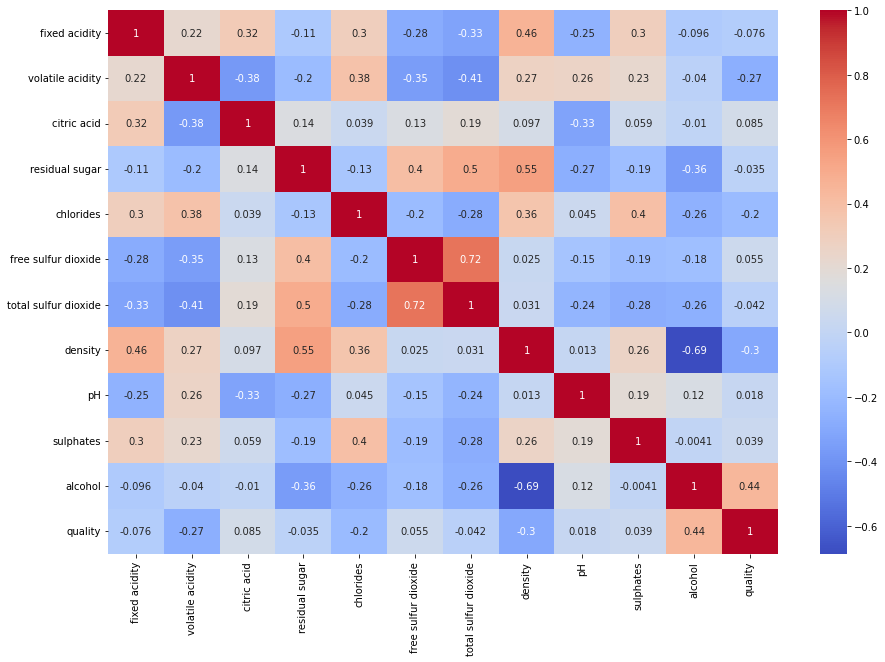

In [34]:
plt.subplots(figsize=(15, 10))
sns.heatmap(winequality.corr(), annot = True, cmap = 'coolwarm')

In [36]:
winequality_all['quality'].value_counts()

6    2620
5    1948
7    1022
8     183
4     182
Name: quality, dtype: int64

# Is it RED or WHITE wine?
### Supervised Classification Problem

# Is this wine a good quality?
### Regression Analysis

## Initial data assessment
### Correlation analysis

### Random Forest as a machine learning regression tree algorithm

### K-Fold Cross Validation

In [ ]:
### three metrics: R-squared, RMSE, and MAE